In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
def cm_plot(y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cmn, cmap='Blues', annot=True, fmt='.2f')
    sns.set(font_scale=1.3)
    plt.title("Confusion Matrix")

    return plt.show()


In [30]:
X_train = np.load("train_x.npy")
y_train = np.load("train_y.npy")
#X_train = pd.DataFrame(data=X_train)
#y_train = pd.DataFrame(data=y_train)
X_test_real = np.load("test_x.npy")
#fig, ax = plt.subplots(figsize=(20, 20))
#ax.scatter(x = X_train[0], y=X_train[0])
#ax.scatter(x = X_train[0], y=X_train[1])
X_test_real.shape

(7225, 187)

In [31]:
def plot_classes(X_train, y_train):
    classes = np.unique(y_train, axis=0)
    plt.figure()
    for c in classes:
        c_x_train = X_train[y_train == c]
        plt.plot(c_x_train[0], label="class " + str(c))
    plt.legend(loc="best")
    print(c_x_train.shape)
    plt.show()
    plt.close()

(12102, 187)


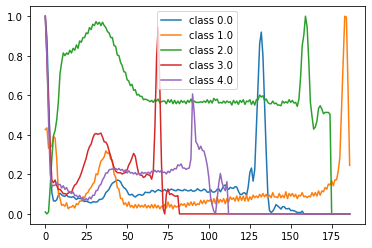

(array([0., 1., 2., 3., 4.]),
 array([12102, 12102, 12102, 12102, 12102], dtype=int64))

In [32]:
np.unique(y_train, return_counts=True)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)


sm = SMOTE(random_state=42, k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train)
plot_classes(X_train, y_train)
np.unique(y_train, return_counts=True)

In [27]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.890052,0.605585,0.308901,0.108202,0.066318,0.064572,0.071553,0.094241,0.104712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.793103,0.466667,0.204598,0.137931,0.144828,0.144828,0.158621,0.147126,0.149425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.922222,0.681481,0.048148,0.022222,0.140741,0.118519,0.096296,0.077778,0.066667,0.074074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.266917,0.000000,0.206767,0.334586,0.402256,0.436090,0.443609,0.421053,0.424812,0.454887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.885312,0.509054,0.255533,0.219316,0.169014,0.126761,0.132797,0.126761,0.114688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14662,1.000000,0.763158,0.557018,0.368421,0.096491,0.013158,0.083333,0.184211,0.184211,0.206140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14663,1.000000,0.454545,0.492424,0.503788,0.534091,0.507576,0.537879,0.492424,0.401515,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14664,0.918762,0.849130,0.524178,0.381044,0.367505,0.338491,0.290135,0.247582,0.212766,0.162476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14665,1.000000,0.979167,0.611742,0.289773,0.240530,0.268939,0.270833,0.276515,0.282197,0.270833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
scaler.fit_transform(X_test_real)
X_test_real.shape

(7225, 187)

In [129]:
!pip install sktime

You should consider upgrading via the 'C:\Users\malko\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [131]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    tf.keras.Input(shape=(187, 1)),
    keras.layers.Conv1D(32, 4, padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool1D(4),
    
   

     keras.layers.Flatten(),
    
     keras.layers.BatchNormalization(),
     keras.layers.Dropout(rate=0.5),
     keras.layers.Dense(5, activation='softmax')

])


In [132]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=1000, decay_rate=0.5)
    ),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
print(np.unique(y_train))

[0. 1. 2. 3. 4.]


In [133]:
y_train = tf.keras.utils.to_categorical(y_train, 5)
y_test = tf.keras.utils.to_categorical(y_test, 5)
X_train = X_train.reshape((X_train.shape[0], 187, 1))
X_test = X_test.reshape((X_test.shape[0], 187, 1))

model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    use_multiprocessing=True,
    workers=8,
    epochs=32
)

Epoch 1/32
317/317 [==============================] - 9s 25ms/step - loss: 0.6876 - precision_2: 0.8298 - recall_2: 0.8142 - val_loss: 6.3584 - val_precision_2: 0.2023 - val_recall_2: 0.2023
Epoch 2/32
317/317 [==============================] - 8s 26ms/step - loss: 0.3718 - precision_2: 0.8880 - recall_2: 0.8729 - val_loss: 0.8910 - val_precision_2: 0.7788 - val_recall_2: 0.7443
Epoch 3/32
317/317 [==============================] - 8s 26ms/step - loss: 0.2930 - precision_2: 0.9068 - recall_2: 0.8910 - val_loss: 11.1970 - val_precision_2: 0.2978 - val_recall_2: 0.2972
Epoch 4/32
317/317 [==============================] - 8s 26ms/step - loss: 0.2691 - precision_2: 0.9120 - recall_2: 0.8960 - val_loss: 8.1202 - val_precision_2: 0.3674 - val_recall_2: 0.3673
Epoch 5/32
317/317 [==============================] - 8s 26ms/step - loss: 0.2456 - precision_2: 0.9207 - recall_2: 0.9052 - val_loss: 7.7229 - val_precision_2: 0.4019 - val_recall_2: 0.4016
Epoch 6/32
317/317 [========================

In [134]:
summary = model.evaluate(X_test, y_test) 
print(f'f1:{2*(summary[1] * summary[2] / (summary[1]))}')

625/625 [==============================] - 1s 2ms/step - loss: 0.1005 - precision_2: 0.9713 - recall_2: 0.9639
f1: 0.9676268130316039


In [135]:
# y_pred_csv = pd.DataFrame(list(range(len(y_pred))), columns=["Id"])
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission.csv", index=False)
y_pred_csv

,ID,Answer
0,0,0
1,1,0
2,2,2
3,3,0
4,4,0
...,...,...
4836,4836,0
4837,4837,0
4838,4838,0
4839,4839,0
